#**Project Title : Market Segmentation in Insurance**

###Problem Statement:

The objective of this project is to develop a customer segmentation strategy for a financial institution to better target their products and services. Market segmentation involves dividing the customer base into distinct groups based on shared characteristics such as demographics, purchasing behavior, and financial needs. By identifying these segments, the financial institution can tailor its offerings to meet the specific needs and preferences of each group, thereby improving customer satisfaction and maximizing business outcomes.

Specifically, the project aims to:

1. Analyze the customer dataset to identify key features and characteristics.
2. Apply clustering techniques to segment the customer base into meaningful groups.
3. Interpret the resulting segments and provide actionable recommendations for targeted marketing strategies and product offerings tailored to each segment.
4. Implement the segmentation strategy to enhance customer engagement, increase sales, and drive business growth.

By successfully implementing a customer segmentation strategy, the financial institution can effectively allocate resources, improve customer satisfaction, and achieve competitive advantage in the market.

Dataset
The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Variables of Dataset

* Balance

* Balance Frequency

* Purchases

* One-off Purchases

* Installment Purchases

* Cash Advance

* Purchases Frequency

* One-off Purchases Frequency

* Purchases Installments Frequency

* Cash Advance Frequency

* Cash Advance TRX

* Purchases TRX

* Credit Limit

* Payments

* Minimum Payments

* PRC Full payment

* Tenure

* Cluster

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

###import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

###mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project_List/models/All model and dataset/Market Segmentation in Insurance Unsupervised/Customer Data.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

###Handling null values

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df['MINIMUM_PAYMENTS'].value_counts()

MINIMUM_PAYMENTS
299.351881     2
342.286490     1
229.411418     1
271.528169     1
6404.855484    1
              ..
616.430163     1
114.231080     1
46.573054      1
365.783240     1
1143.067027    1
Name: count, Length: 8636, dtype: int64

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [ ]:
df = df.dropna(subset=['CREDIT_LIMIT'], axis=0)

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
duplicates =len(df[df.duplicated()])
print(duplicates)

0


###EDA

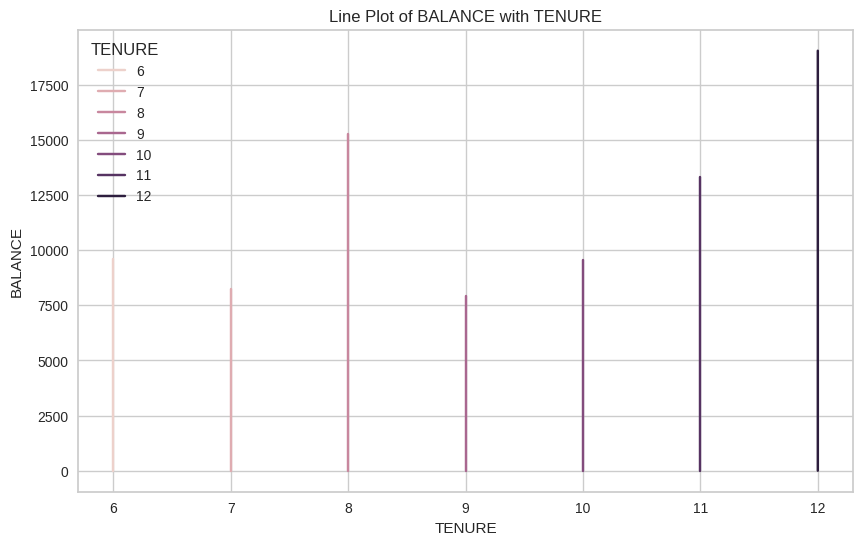

In [ ]:
# Plot 1: Line plot of 'BALANCE' with 'TENURE' as hue
plt.figure(figsize=(10, 6))
sns.lineplot(x='TENURE', y='BALANCE', hue='TENURE', orient='y',data=df)
plt.title('Line Plot of BALANCE with TENURE')
plt.xlabel('TENURE')
plt.ylabel('BALANCE')
plt.show()

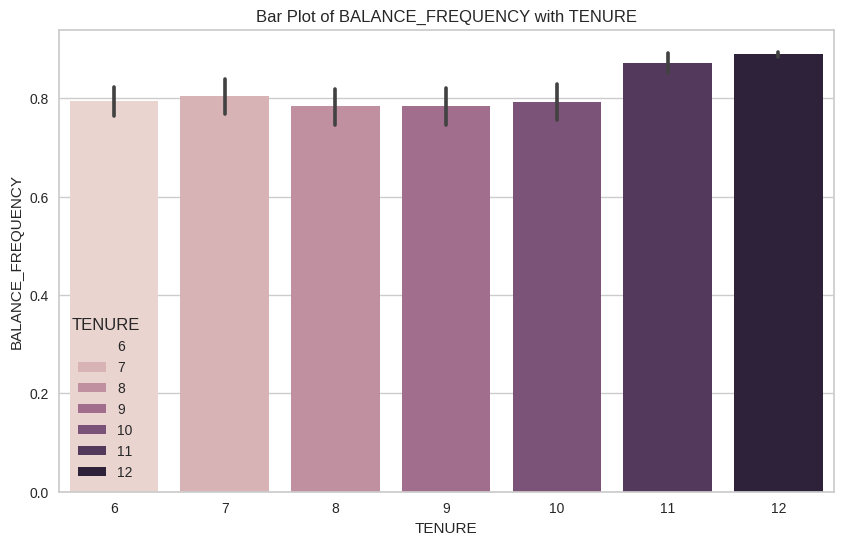

In [ ]:
# Plot 2: Bar plot of 'BALANCE_FREQUENCY' with 'TENURE' as hue
plt.figure(figsize=(10, 6))
sns.barplot(x='TENURE', y='BALANCE_FREQUENCY', hue='TENURE', data=df)
plt.title('Bar Plot of BALANCE_FREQUENCY with TENURE')
plt.xlabel('TENURE')
plt.ylabel('BALANCE_FREQUENCY')
plt.show()

*   The image is a bar chart that shows the frequency of a certain balance value  at each tenure. It appears that there are more accounts with a balance frequency of around 0.2 and 0.4 at a tenure of 7.


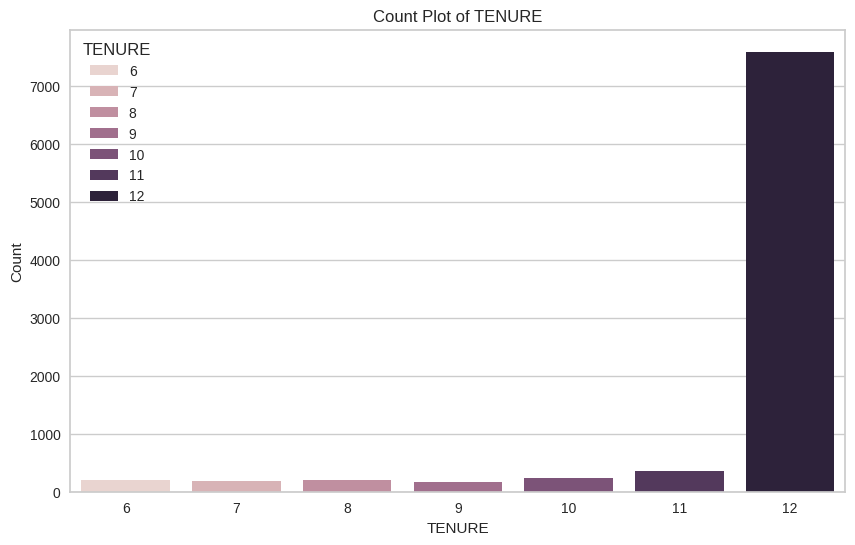

In [ ]:
# Plot 3: Count plot of 'PURCHASES' with 'TENURE' as hue
plt.figure(figsize=(10, 6))
sns.countplot(x='TENURE', hue='TENURE', data=df)
plt.title('Count Plot of TENURE')
plt.xlabel('TENURE')
plt.ylabel('Count')
plt.show()

Here are some insights you can glean from this count plot:

* Tenure 12 appears to have the most purchases made by customers.

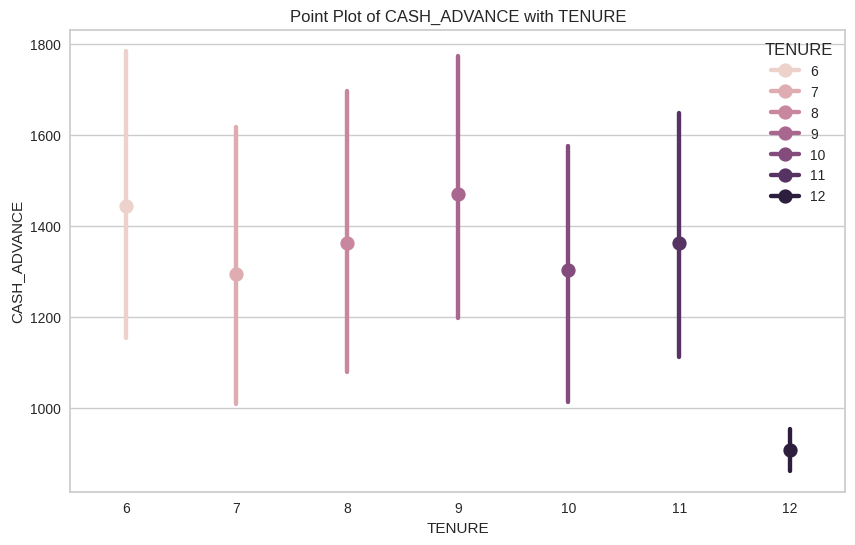

In [ ]:
# Plot 5: Point plot of 'CASH_ADVANCE' with 'TENURE' as hue
plt.figure(figsize=(10, 6))
sns.pointplot(x='TENURE', y='CASH_ADVANCE', hue='TENURE', data=df)
plt.title('Point Plot of CASH_ADVANCE with TENURE')
plt.xlabel('TENURE')
plt.ylabel('CASH_ADVANCE')
plt.show()

There is a spread of cash advance amounts across tenures.

* It appears that cash advance amounts tend to be higher at tenures 9

* There may be outliers in terms of cash advance amount, particularly at tenures 7, 9, and 11. An outlier is a data point that is significantly different from the rest of the data points.

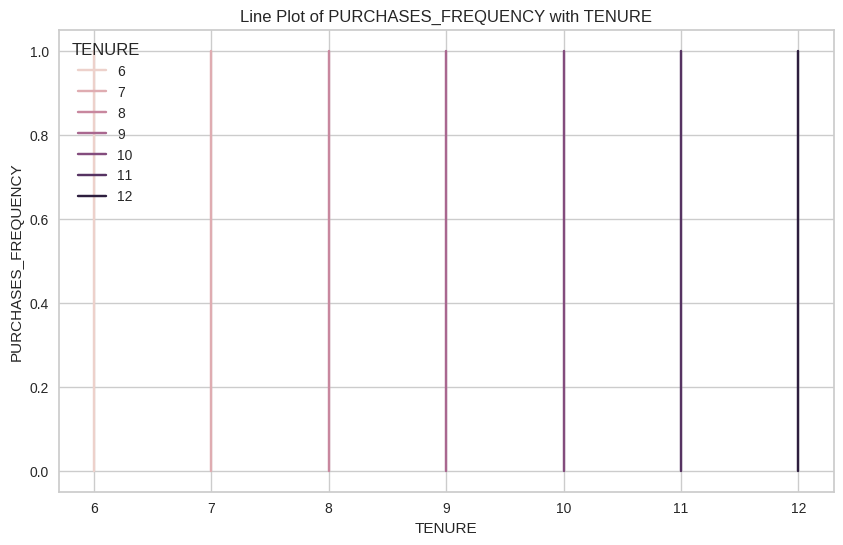

In [ ]:
# Plot 6: Line plot of 'PURCHASES_FREQUENCY' with 'TENURE' as hue
plt.figure(figsize=(10, 6))
sns.lineplot(x='TENURE', y='PURCHASES_FREQUENCY', hue='TENURE',orient='y',data=df)
plt.title('Line Plot of PURCHASES_FREQUENCY with TENURE')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES_FREQUENCY')
plt.show()

Here are some insights you can glean from this line plot:

*  Purchase frequency appears to be relatively stable across tenure.

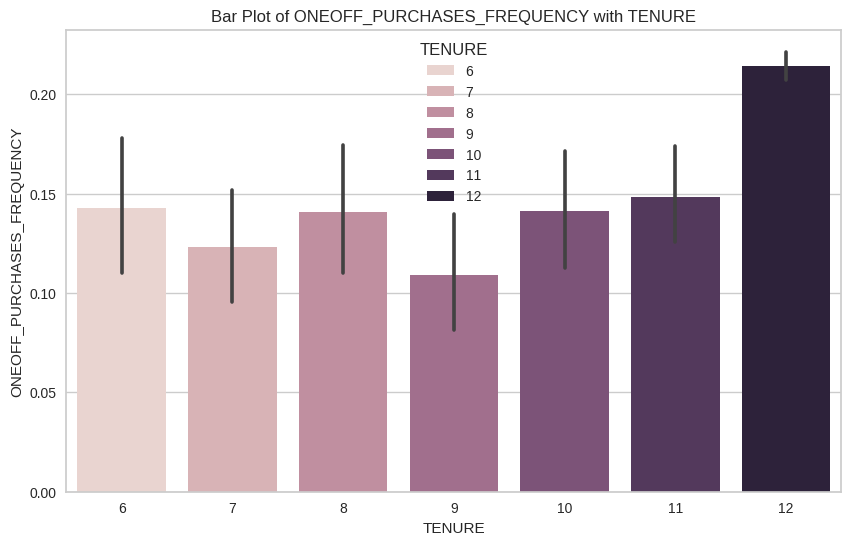

In [ ]:
# Plot 7: Bar plot of 'ONEOFF_PURCHASES_FREQUENCY' with 'TENURE' as hue
plt.figure(figsize=(10, 6))
sns.barplot(x='TENURE', y='ONEOFF_PURCHASES_FREQUENCY', hue='TENURE', data=df)
plt.title('Bar Plot of ONEOFF_PURCHASES_FREQUENCY with TENURE')
plt.xlabel('TENURE')
plt.ylabel('ONEOFF_PURCHASES_FREQUENCY')
plt.show()

Here are some insights you can glean from this bar chart:

*  Customers with tenure 9 appear to make the most one-off purchases.

*  Tenures with lower frequencies of one-off purchases include 6, 8, 10, 11, and 12.

*  It is possible that there are ties in the number of one-off purchases made between tenures since the bars have width.


The image is a count plot, and it appears to be incorrect. The count plot shows the number of data points for each category on the x-axis, which in this case is tenure. However, the hue argument in the sns.countplot function is set to 'TENURE' as well, which would cause the data to be colored by tenure, introducing redundancy.  Here are some possible reasons why this plot might be incorrect:

* There might be a bug in the code that generates the plot.
* The code that generates the plot might be incorrect. It is possible that 'TENURE' was meant to be replaced with another variable.

Without seeing the code that generates the plot it is difficult to say for sure what caused this error.

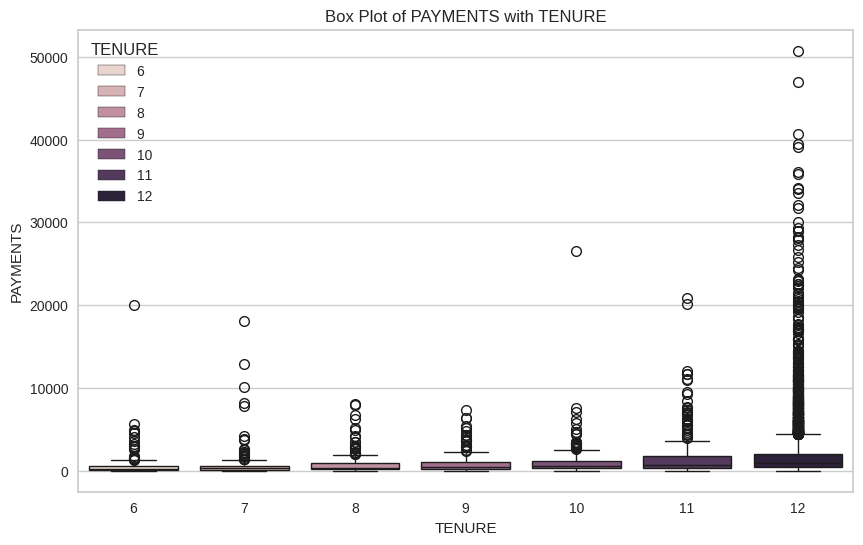

In [ ]:
# Plot 8: Box plot of 'PAYMENTS' with 'TENURE' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='TENURE', y='PAYMENTS', hue='TENURE', data=df)
plt.title('Box Plot of PAYMENTS with TENURE')
plt.xlabel('TENURE')
plt.ylabel('PAYMENTS')
plt.show()

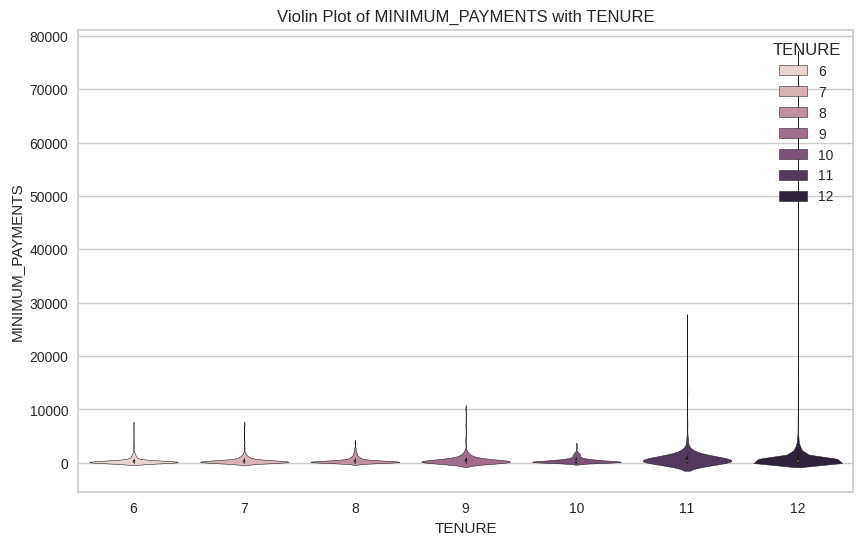

In [ ]:
# Plot 10: Violin plot of 'MINIMUM_PAYMENTS' with 'TENURE' as hue
plt.figure(figsize=(10, 6))
sns.violinplot(x='TENURE', y='MINIMUM_PAYMENTS', hue='TENURE', data=df)
plt.title('Violin Plot of MINIMUM_PAYMENTS with TENURE')
plt.xlabel('TENURE')
plt.ylabel('MINIMUM_PAYMENTS')
plt.show()

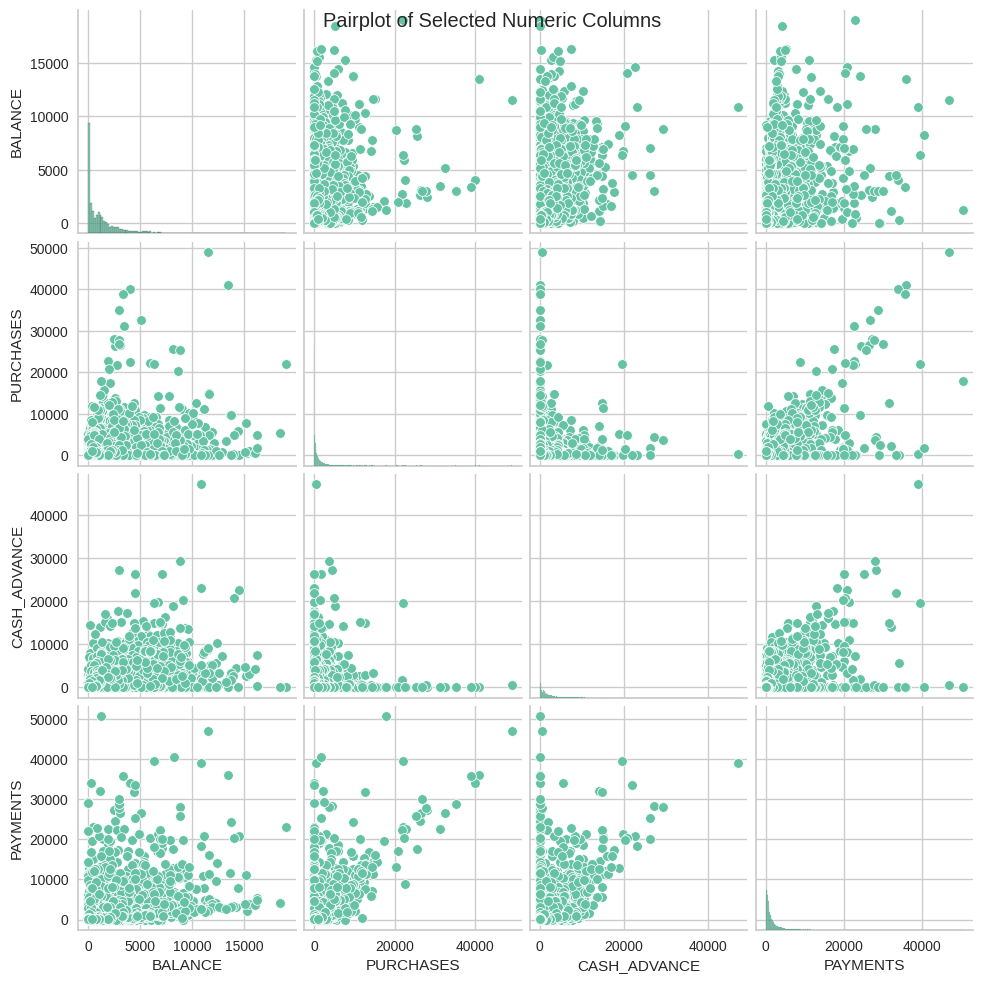

In [ ]:
# Plot 11: Pairplot of selected numeric columns
selected_columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']
sns.pairplot(df[selected_columns])
plt.suptitle('Pairplot of Selected Numeric Columns')
plt.show()

The image is a pairplot, which is a collection of scatter plots that show the relationship between pairs of numeric columns in a dataframe. The selected columns in this case are 'BALANCE', 'PURCHASES', 'CASH_ADVANCE', and 'PAYMENTS'.

Here are some of the relationships you can see from the pairplot:

* **Balance vs Purchases:** There appears to be a positive correlation between balance and purchases. This means that customers with higher balances tend to also have higher purchases.
* **Balance vs Cash Advance:** The relationship between balance and cash advance is less clear. There is some scatter in the plot, but it is difficult to see a definitive trend.
* **Balance vs Payments:** There appears to be a weak positive correlation between balance and payments. This means that customers with higher balances tend to also have higher payments.  
* **Purchases vs Cash Advance:** There is a weak positive correlation between purchases and cash advance. This means that customers who make higher purchases also tend to take out higher cash advances.
* **Purchases vs Payments:** There appears to be a positive correlation between purchases and payments. This means that customers who make higher purchases also tend to make higher payments.  
* **Cash Advance vs Payments:** The relationship between cash advance and payments is less clear. There is some scatter in the plot, but it is difficult to see a definitive trend.

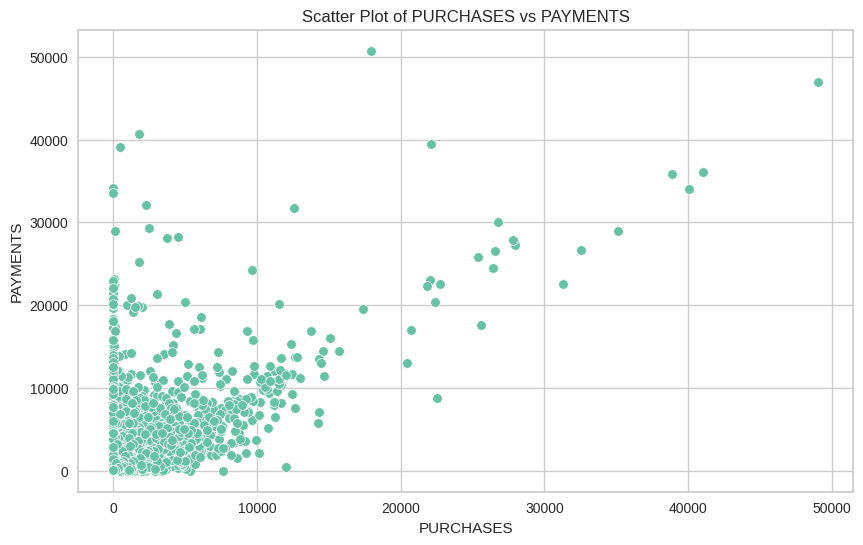

In [ ]:
# Plot 12: Scatter plot of 'PURCHASES' vs 'PAYMENTS'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PURCHASES', y='PAYMENTS', data=df)
plt.title('Scatter Plot of PURCHASES vs PAYMENTS')
plt.xlabel('PURCHASES')
plt.ylabel('PAYMENTS')
plt.show()

*  From the scatter plot, it appears that there is a positive correlation between purchases and payments. This means that customers who tend to purchase more also tend to pay more. However, there is also a lot of scatter in the data, which means that there are some customers who make high purchases but don't necessarily make high payments, and vice versa.

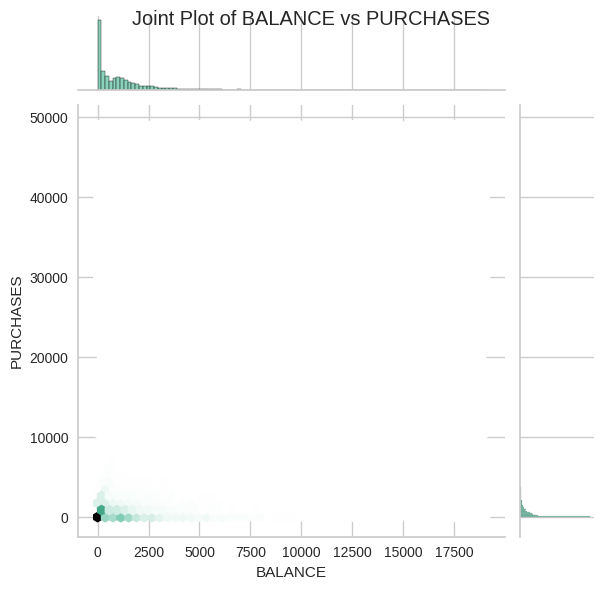

In [ ]:
# Plot 13: Joint plot of 'BALANCE' vs 'PURCHASES'
sns.jointplot(x='BALANCE', y='PURCHASES', data=df, kind='hex')
plt.suptitle('Joint Plot of BALANCE vs PURCHASES')
plt.show()

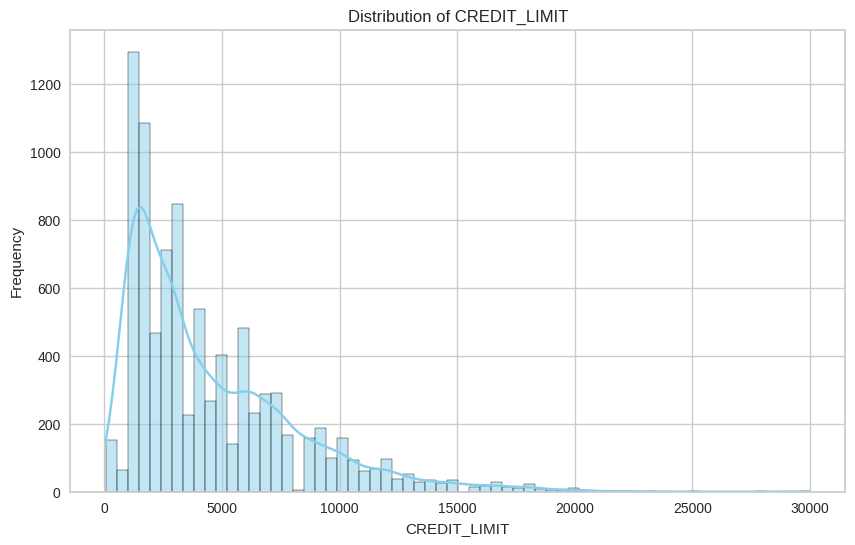

In [ ]:
# Plot 14: Distribution plot of 'CREDIT_LIMIT'
plt.figure(figsize=(10, 6))
sns.histplot(df['CREDIT_LIMIT'], kde=True, color='skyblue')
plt.title('Distribution of CREDIT_LIMIT')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Frequency')
plt.show()

* The image is a histogram of the credit limit in a dataframe. The x-axis shows the credit limit and the y-axis shows the frequency. The distribution of the credit limit appears to be right-skewed. This means that there are more customers with lower credit limits than there are customers with higher credit limits.

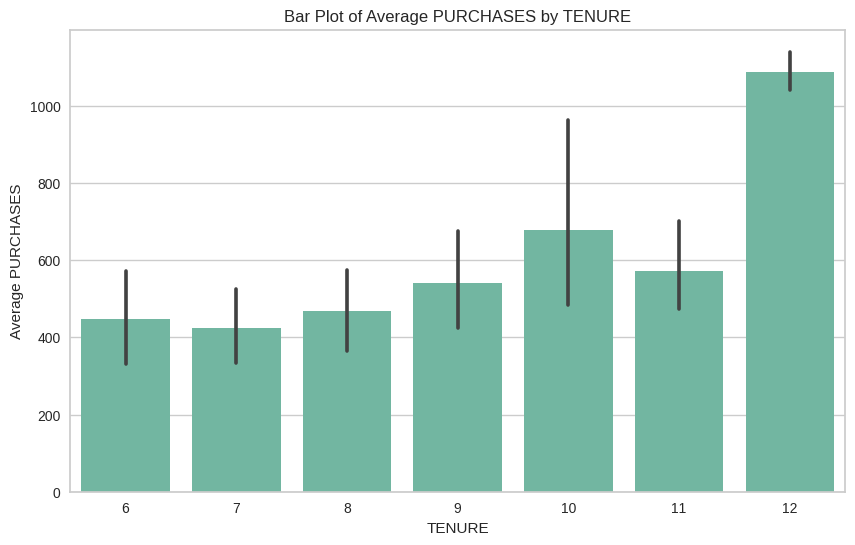

In [ ]:
# Plot 15: Bar plot of average 'PURCHASES' by 'TENURE'
plt.figure(figsize=(10, 6))
sns.barplot(x='TENURE', y='PURCHASES', data=df, estimator=np.mean)
plt.title('Bar Plot of Average PURCHASES by TENURE')
plt.xlabel('TENURE')
plt.ylabel('Average PURCHASES')
plt.show()

The image is a bar chart that shows the average purchase amount by tenure. The x-axis tenure represents the length of time that a customer has been with the company and the y-axis average purchases represents the average amount a customer spends.

Here are some insights you can glean from this bar chart:

* Customers with tenure 12 appear to have the highest average purchases.


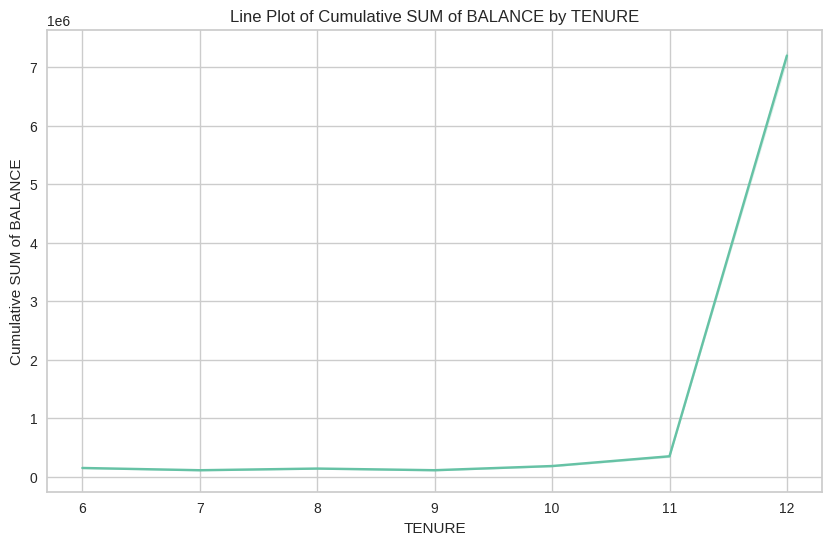

In [ ]:
# Plot 16: Line plot of cumulative sum of 'BALANCE' by 'TENURE'
plt.figure(figsize=(10, 6))
sns.lineplot(x='TENURE', y=df.groupby('TENURE')['BALANCE'].cumsum(), data=df)
plt.title('Line Plot of Cumulative SUM of BALANCE by TENURE')
plt.xlabel('TENURE')
plt.ylabel('Cumulative SUM of BALANCE')
plt.show()

The image is a line plot that shows the cumulative sum of balance by tenure. The x-axis shows the tenure, or the length of time a customer has been with the company, and the y-axis shows the cumulative sum of the balance. The cumulative sum is the total balance for each tenure, up to that tenure.

Here are some insights you can glean from this line plot:

* The cumulative sum of balance increases with tenure. This means that customers with a longer tenure tend to have higher balances on average. This could be due to a number of factors, such as:
    * Customers with a longer tenure may have had more time to accumulate credit card debt.
    * The bank may issue higher credit limits to customers with a longer tenure.
    * Customers with a longer tenure may be more likely to use their credit cards for larger purchases.

It is important to note that this line plot only shows the cumulative sum of balance, and does not show the average balance by tenure. To see the average balance by tenure, you could create a bar chart of the average balance by tenure.

Overall, the line plot suggests that there is a positive relationship between tenure and balance. However, more analysis would be needed to draw any definitive conclusions.

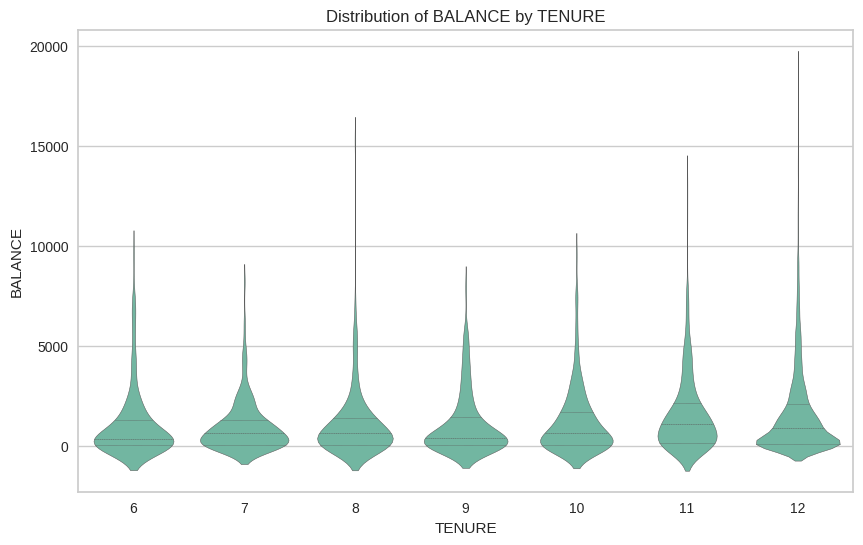

In [ ]:
# Plot 17: Distribution of 'BALANCE' by 'TENURE' using violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='TENURE', y='BALANCE', data=df, inner='quartile')
plt.title('Distribution of BALANCE by TENURE')
plt.xlabel('TENURE')
plt.ylabel('BALANCE')
plt.show()

<Figure size 1000x600 with 0 Axes>

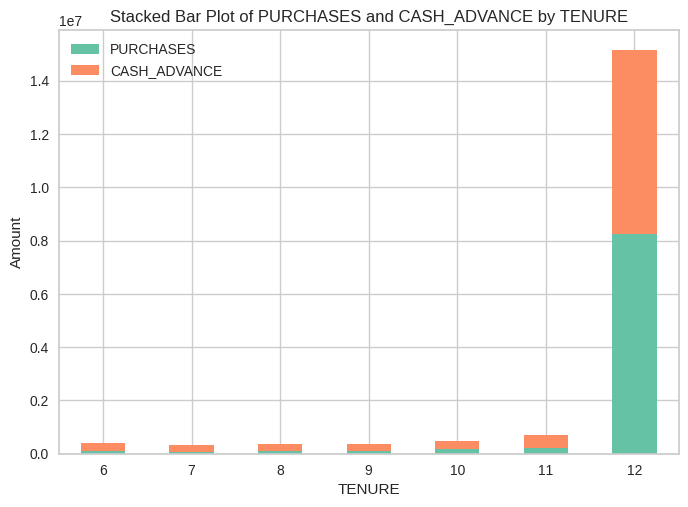

In [ ]:
# Plot 18: Stacked bar plot of 'PURCHASES' and 'CASH_ADVANCE' by 'TENURE'
plt.figure(figsize=(10, 6))
df[['PURCHASES', 'CASH_ADVANCE']].groupby(df['TENURE']).sum().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of PURCHASES and CASH_ADVANCE by TENURE')
plt.xlabel('TENURE')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

The image is a stacked bar chart that shows the total amount of purchases and cash advances made by customers with a certain tenure. The x-axis tenure represents the length of time that a customer has been with the company and the y-axis amount represents the total amount spent on purchases and cash advances. The colors in the stacked bar represent the category (purchases or cash advance).

Here are some insights you can glean from this stacked bar chart:

* Customers with tenure 12 appear to have spent the most overall on purchases and cash advances.

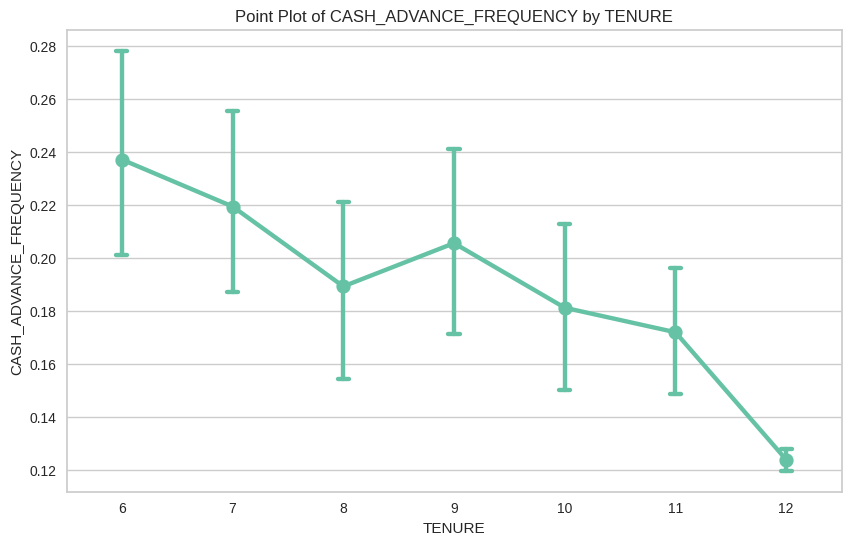

In [ ]:
# Plot 19: Point plot of 'CASH_ADVANCE_FREQUENCY' by 'TENURE'
plt.figure(figsize=(10, 6))
sns.pointplot(x='TENURE', y='CASH_ADVANCE_FREQUENCY', data=df, capsize=0.1)
plt.title('Point Plot of CASH_ADVANCE_FREQUENCY by TENURE')
plt.xlabel('TENURE')
plt.ylabel('CASH_ADVANCE_FREQUENCY')
plt.show()

The image is a point plot that shows the frequency of cash advances by tenure. The x-axis shows the tenure, or the length of time a customer has been with the company, and the y-axis shows the cash advance frequency. Each point represents a customer's cash advance frequency for a particular tenure.

Here are some insights you can glean from this point plot:

* There is a spread of cash advance frequency across tenures.
* It appears that cash advance frequency tends to be higher at tenures 9, 10, and 11.

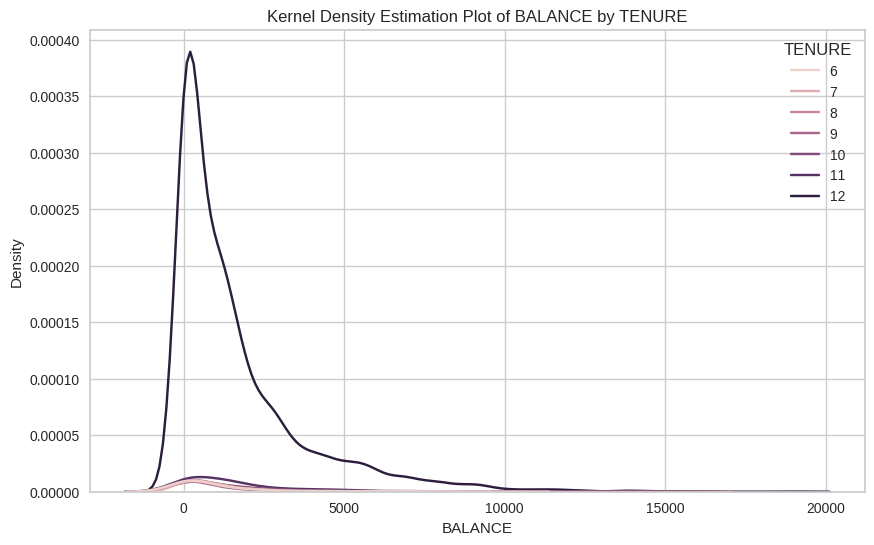

In [ ]:
# Plot 20: Kernel density estimation plot of 'BALANCE' by 'TENURE'
plt.figure(figsize=(10, 6))
sns.kdeplot(x='BALANCE', hue='TENURE', data=df)
plt.title('Kernel Density Estimation Plot of BALANCE by TENURE')
plt.xlabel('BALANCE')
plt.ylabel('Density')
plt.show()

The image is a kernel density estimation (KDE) plot of balance by tenure.  KDE is a non-parametric way to estimate the probability density function of a variable. In simpler terms, it shows the distribution of a continuous variable, in this case the balance, for each tenure.

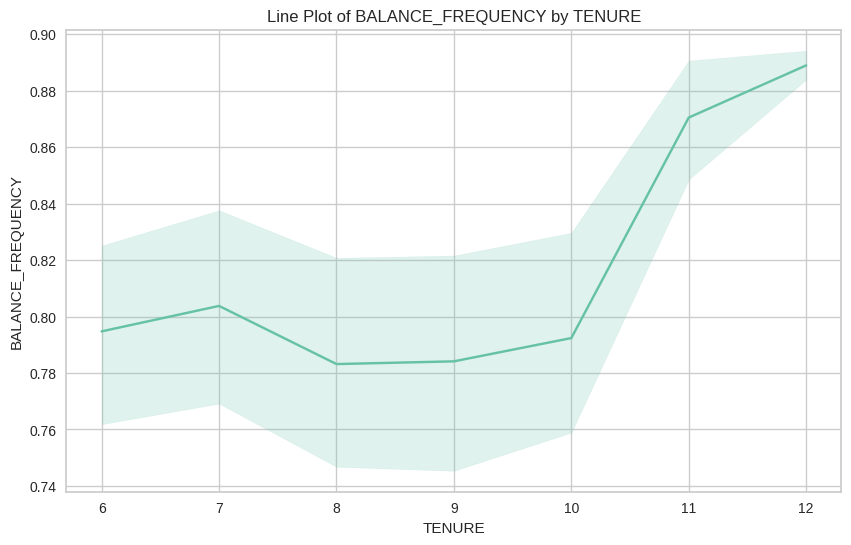

In [ ]:
# Plot 21: Line plot of 'BALANCE_FREQUENCY' by 'TENURE'
plt.figure(figsize=(10, 6))
sns.lineplot(x='TENURE', y='BALANCE_FREQUENCY', data=df, estimator=np.mean)
plt.title('Line Plot of BALANCE_FREQUENCY by TENURE')
plt.xlabel('TENURE')
plt.ylabel('BALANCE_FREQUENCY')
plt.show()

The image is a line plot that shows the average balance frequency by tenure. The x-axis  represents the tenure, or the length of time a customer has been with the company, and the y-axis shows the average balance frequency. The balance frequency is the ratio of the number of months a customer has a balance greater than zero to the total number of months the customer has been with the bank.

Here are some insights you can glean from this line plot:

* The average balance frequency appears to be relatively stable across tenure. There is a slight increase after 10.

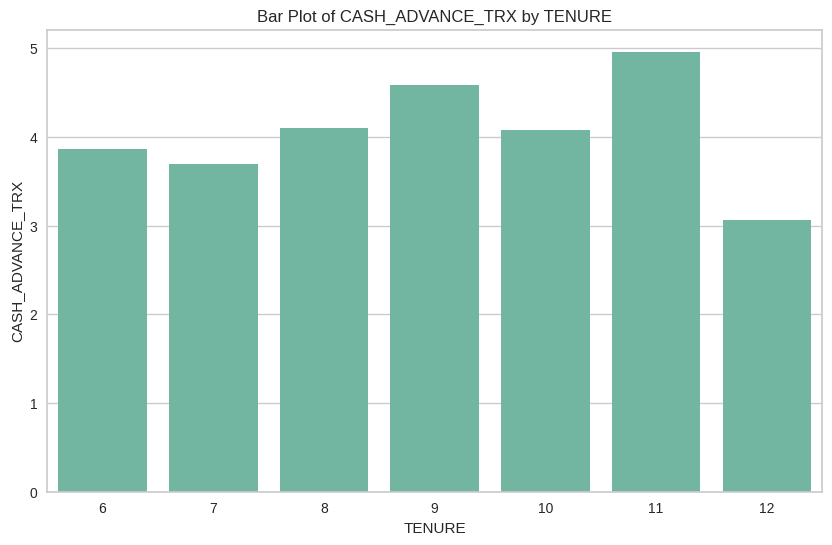

In [ ]:
# Plot 22: Bar plot of 'CASH_ADVANCE_TRX' by 'TENURE'
plt.figure(figsize=(10, 6))
sns.barplot(x='TENURE', y='CASH_ADVANCE_TRX', data=df, ci=None)
plt.title('Bar Plot of CASH_ADVANCE_TRX by TENURE')
plt.xlabel('TENURE')
plt.ylabel('CASH_ADVANCE_TRX')
plt.show()

The image is a bar chart that shows the number of cash advance transactions made by customers with a certain tenure. The x-axis tenure represents the length of time that a customer has been with the company and the y-axis cash advance transaction (CASH_ADVANCE_TRX) represents the number of cash advance transactions made by a customer.

Here are some insights you can glean from this bar chart:

* Customers with tenure 7 appear to have made the most cash advance transactions.

Overall, the tenure with the most cash advance transactions could be due to a variety of factors such as new customer promotions or changes in customer behavior over time.

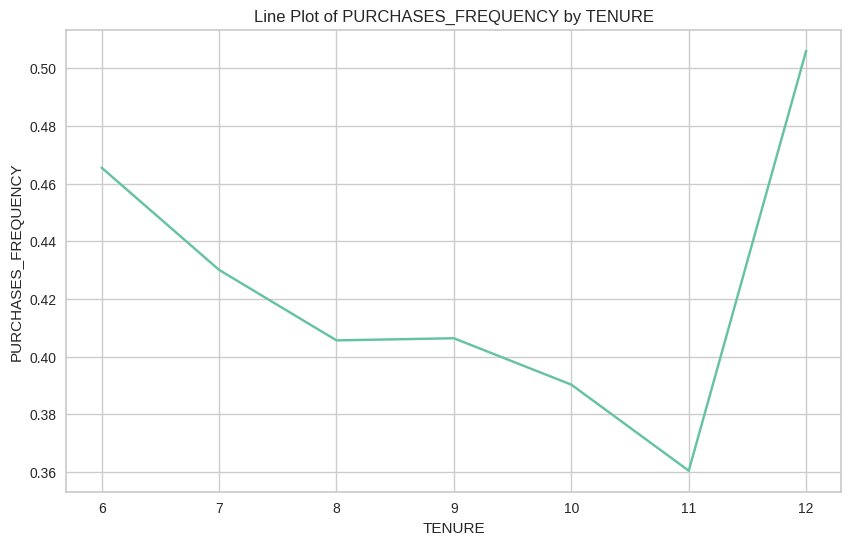

In [ ]:
# Plot 23: Line plot of 'PURCHASES_FREQUENCY' by 'TENURE'
plt.figure(figsize=(10, 6))
sns.lineplot(x='TENURE', y='PURCHASES_FREQUENCY', data=df, ci=None)
plt.title('Line Plot of PURCHASES_FREQUENCY by TENURE')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES_FREQUENCY')
plt.show()

The image is a line plot that shows the average purchase frequency by tenure. The x-axis  represents the tenure, or the length of time a customer has been with the company, and the y-axis shows the average purchase frequency. The purchase frequency is the ratio of the number of months a customer has made a purchase to the total number of months the customer has been with the bank.

Here are some insights you can glean from this line plot:

* The average purchase frequency appears to be relatively stable across tenure. There is a slight increase around tenure 9 or 10, but it levels out by tenure 12.

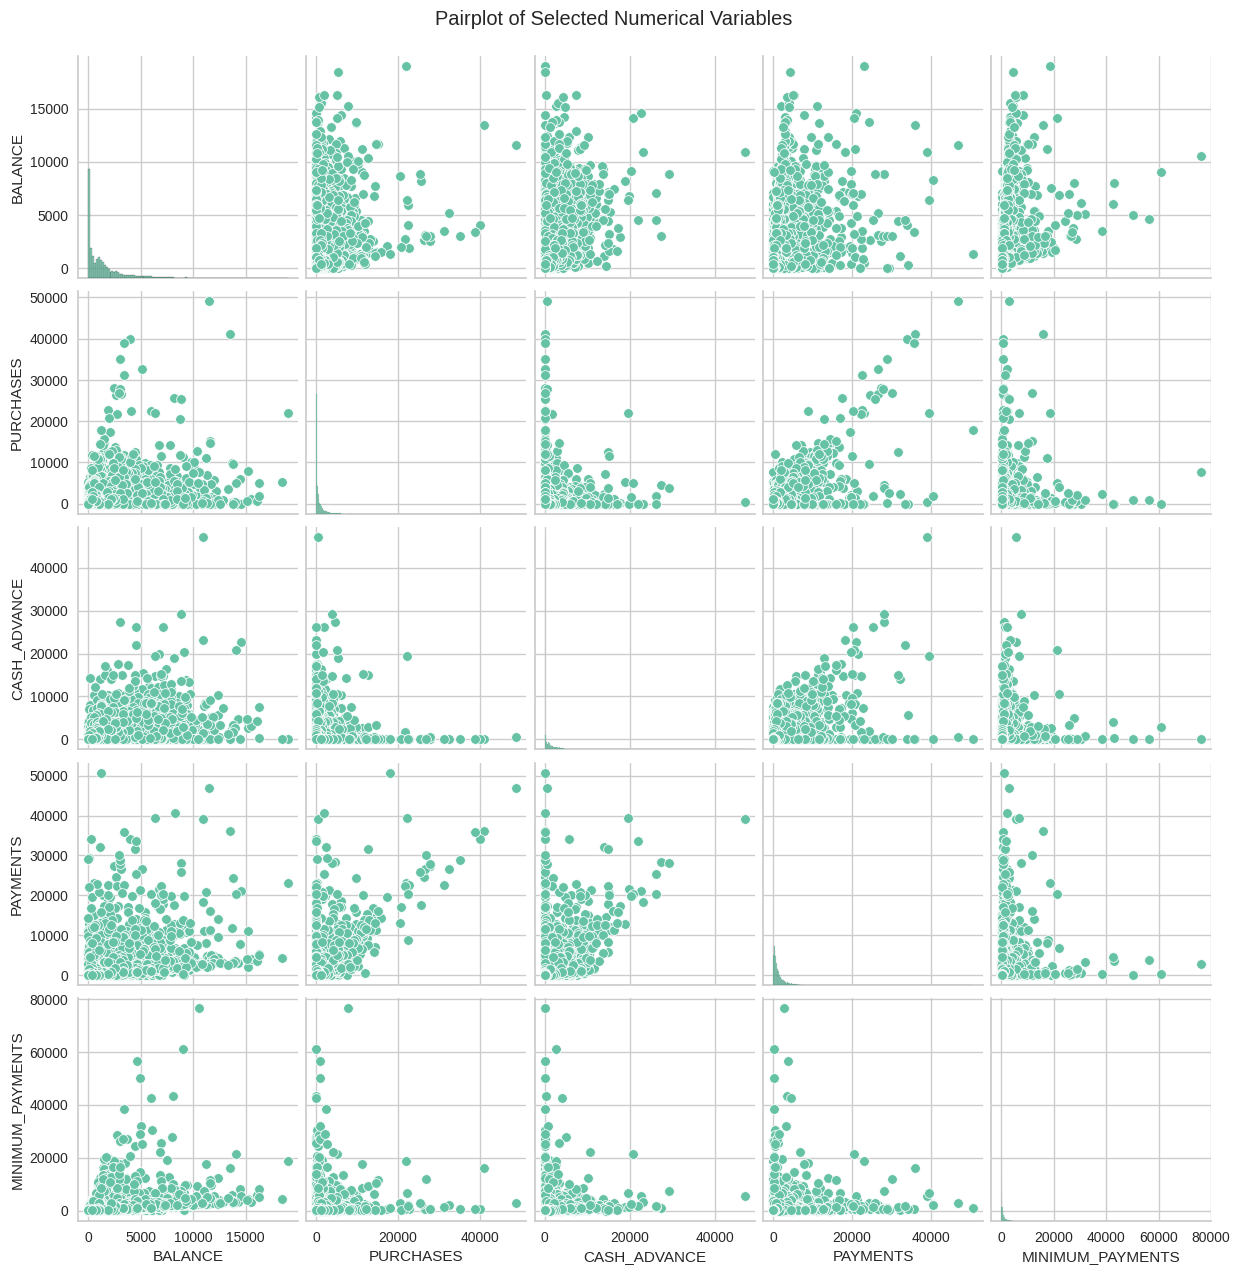

In [ ]:
# Plot 23: Pairplot of selected numerical variables
num_vars = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']
sns.pairplot(df[num_vars])
plt.suptitle('Pairplot of Selected Numerical Variables', y=1.02)
plt.show()

The image is a pairplot, which is a collection of scatter plots that show the relationship between pairs of numeric columns in a dataframe. The selected columns in this case are 'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', and 'MINIMUM_PAYMENTS'.

Here are some of the relationships you can see from the pairplot:

* **Balance vs Purchases:** There appears to be a positive correlation between balance and purchases. This means that customers with higher balances tend to also have higher purchases.
* **Balance vs Cash Advance:** The relationship between balance and cash advance is less clear. There is some scatter in the plot, but it is difficult to see a definitive trend.
* **Balance vs Payments:** There appears to be a weak positive correlation between balance and payments. This means that customers with higher balances tend to also have higher payments.  
* **Purchases vs Cash Advance:** There is a weak positive correlation between purchases and cash advance. This means that customers who make higher purchases also tend to take out higher cash advances.
* **Purchases vs Payments:** There appears to be a positive correlation between purchases and payments. This means that customers who make higher purchases also tend to make higher payments.  
* **Cash Advance vs Payments:** The relationship between cash advance and payments is less clear. There is some scatter in the plot, but it is difficult to see a definitive trend.

In [ ]:
df = df.drop(columns=['CUST_ID'])

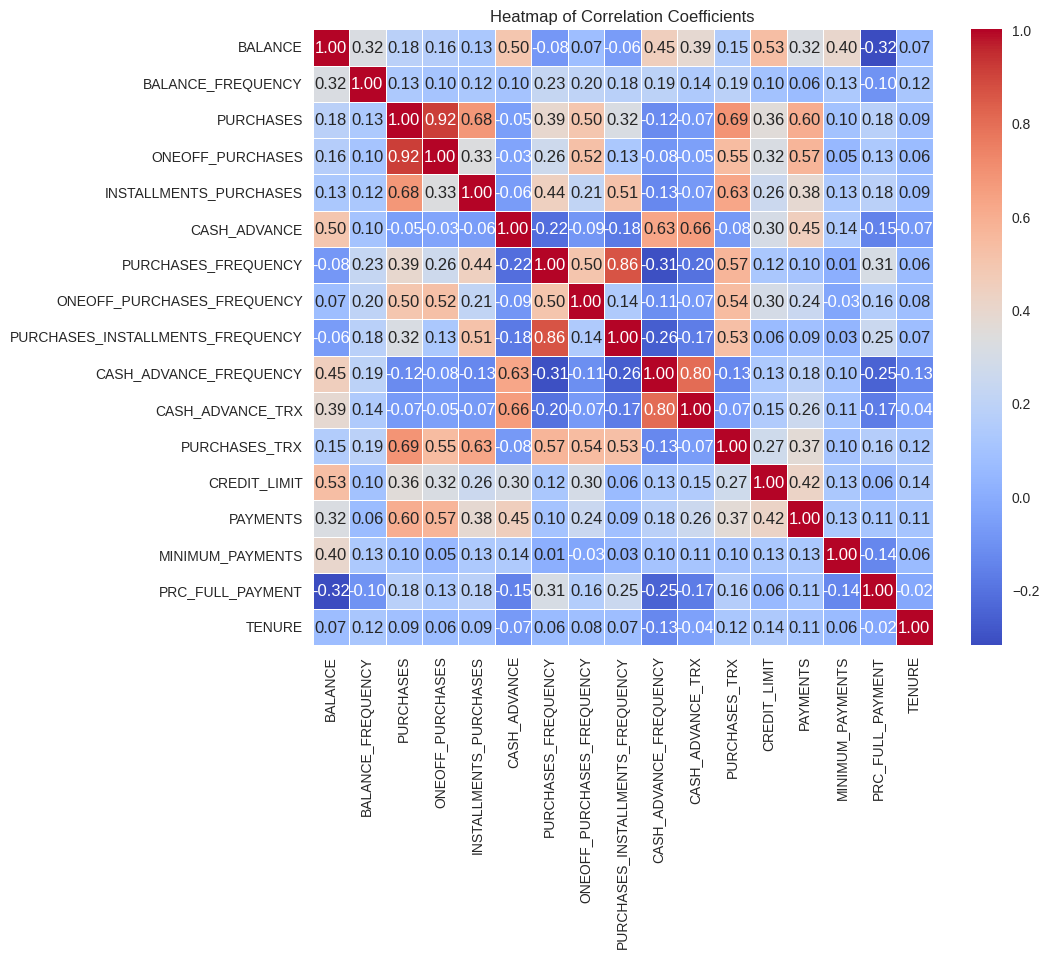

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

### drop ONEOFF_PURCHASES

In [ ]:
df.drop(columns=['ONEOFF_PURCHASES'],axis=1,inplace=True)

###Scaling features

In [ ]:
# First, you might want to scale your data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### kMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=5)

In [ ]:
kmeans.fit(scaled_data)

KMeans(n_clusters=5)

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
df['cluster'] = cluster_labels

In [ ]:
# Calculate summary statistics for each cluster
cluster_summary = df.groupby('cluster').agg({
    'BALANCE': 'mean',
    'PURCHASES': 'mean',
    'CASH_ADVANCE': 'mean',
    # Add more columns as needed
})

print(cluster_summary)

             BALANCE    PURCHASES  CASH_ADVANCE
cluster                                        
0         112.161777   338.652722    325.258838
1         947.028476  1386.627199    224.037491
2        3924.275287  8148.716220    683.622161
3        1524.176304   267.523291    793.007261
4        4895.322570   589.039829   4981.676188


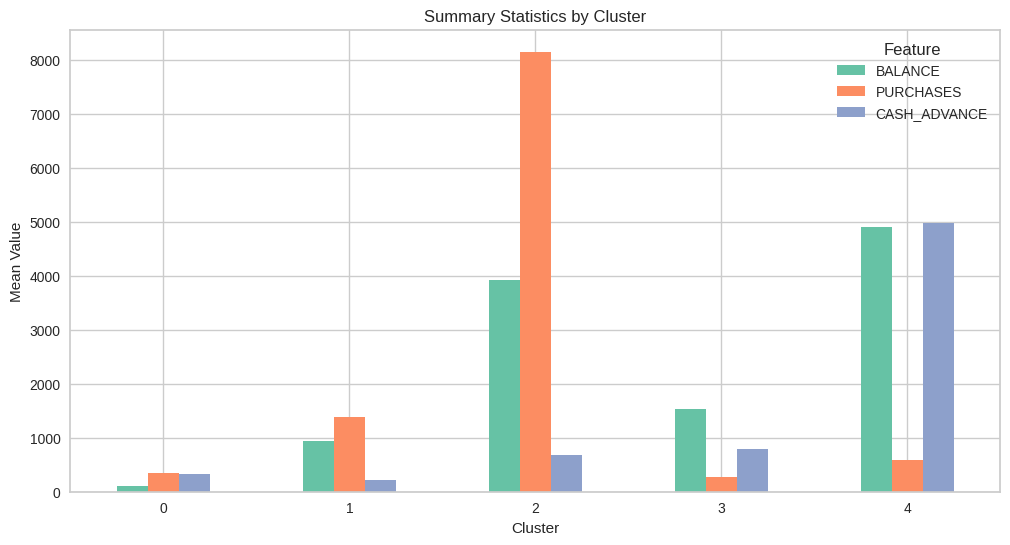

In [ ]:
# Plot summary statistics for each cluster
cluster_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Summary Statistics by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Feature')
plt.show()

The image is a bar chart that summarizes the average balance, purchases, and cash advance by customer cluster. The x-axis shows the cluster number and the y-axis shows the average value.  Here are some insights you can glean from this chart:

* Customers in cluster 2 have the highest average balance, followed by clusters 4, 3, 1, and 0.
* Customers in cluster 2 also have the highest average purchases, followed by cluster 4, 1, 0, and 3.
* Customers in cluster 0 have the lowest average cash advance, followed by clusters 1, 2, 4, and 3.
* Cluster 3 appears to have the lowest average purchase amount and the highest average cash advance.

###Elbow Method

In [ ]:
# Define a range of clusters to try
k_values = range(1, 11)

In [ ]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS) for each k
wcss = []

In [ ]:
# Fit KMeans for each value of k and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

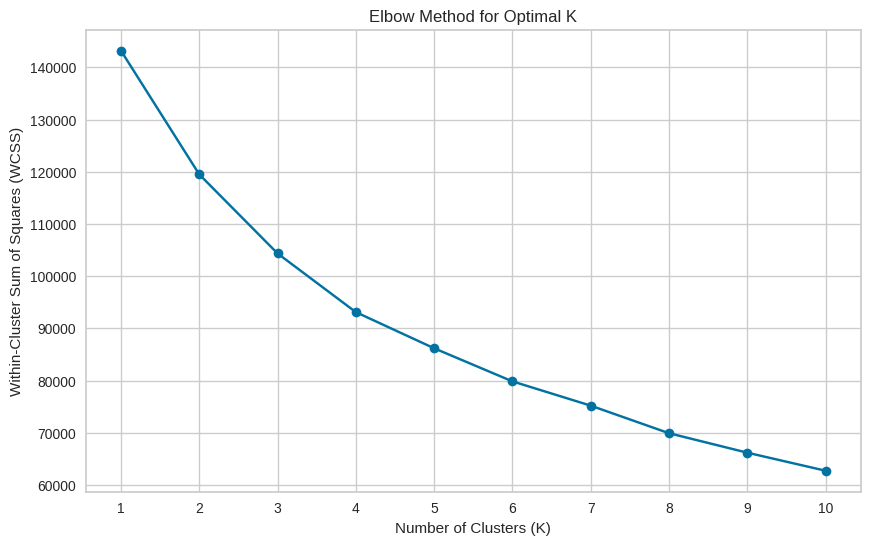

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

###Number of cluster is 4

In [ ]:
# Step 1: Re-run K-means with optimal k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Step 2: Assign cluster labels
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

In [ ]:
# Step 3: Analyze cluster characteristics
cluster_summary = df.groupby('cluster').agg({
    'BALANCE': 'mean',
    'PURCHASES': 'mean',
    'CASH_ADVANCE': 'mean',
    # Add more columns as needed
})
print(cluster_summary)

             BALANCE    PURCHASES  CASH_ADVANCE
cluster                                        
0        3656.937623  7125.056749    700.090783
1        4546.375125   493.703478   4523.458212
2        1015.191791   277.643285    591.663915
3         869.090336  1237.929178    202.838109


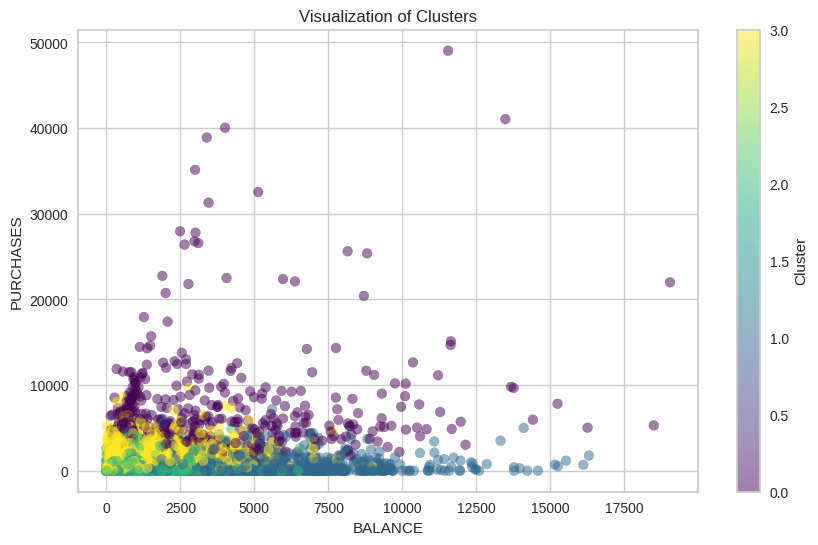

In [ ]:
# Step 4: Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['BALANCE'], df['PURCHASES'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()

###Silhouette Score

In [ ]:
# Compute Silhouette Score
silhouette = silhouette_score(scaled_data, cluster_labels)

In [ ]:
# Compute Davies–Bouldin Index
davies_bouldin = davies_bouldin_score(scaled_data, cluster_labels)

In [ ]:
# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(scaled_data, cluster_labels)

In [ ]:
print(f"Silhouette Score: {silhouette}")
print(f"Davies–Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.1992418575408478
Davies–Bouldin Index: 1.5865993136884926
Calinski-Harabasz Index: 1603.7596078129918


Based on the evaluation metrics:

Silhouette Score: 0.1992 :

The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. In this case, the silhouette score is relatively low, indicating that the clusters may not be well-separated or distinct.

Davies–Bouldin Index: 1.5866 :

The Davies–Bouldin index evaluates the average similarity between each cluster and its most similar cluster, where a lower value suggests better clustering. Here, the index value is moderate, indicating a reasonable level of separation between clusters.

Calinski-Harabasz Index: 1603.7596 :

The Calinski-Harabasz index measures the ratio of between-cluster dispersion to within-cluster dispersion, with higher values indicating better-defined clusters. The index value is relatively high, suggesting that the clusters are well-separated.

###Agglomerative Clustering

In [ ]:
X_train, X_test = train_test_split(df, train_size=0.9, shuffle=True, random_state=42)

In [ ]:
AggClusteringModel = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')

y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

###Dendrogram

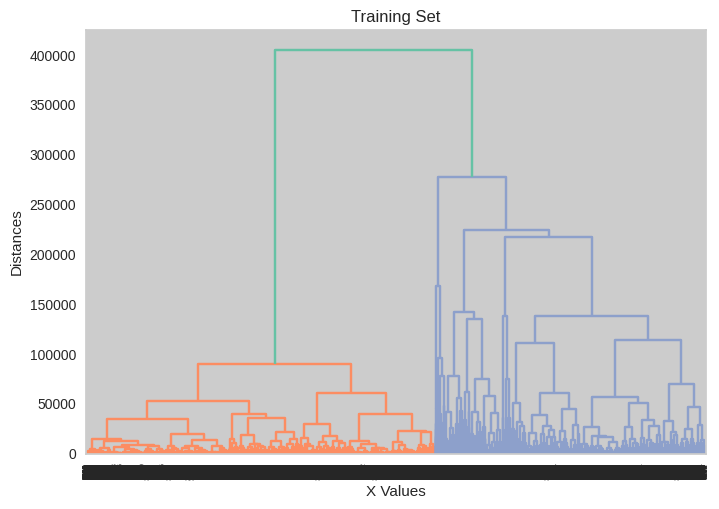

In [ ]:
#draw the Hierarchical graph for Training set
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set')
plt.xlabel('X Values')
plt.ylabel('Distances')
plt.show()

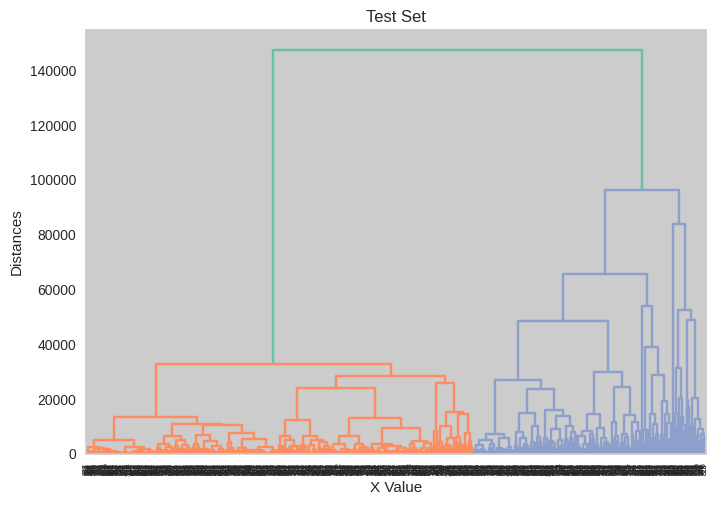

In [ ]:
#draw the Hierarchical graph for Test set
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set')
plt.xlabel('X Value')
plt.ylabel('Distances')
plt.show()

Summary:

The project aimed to develop a customer segmentation strategy for a financial institution to better target its products and services. Market segmentation is crucial in understanding customer behavior and preferences, allowing businesses to tailor their offerings to meet specific customer needs. The dataset provided detailed behavioral variables for approximately 9000 active credit cardholders over the last 6 months.

Key Steps:

1. Data Analysis: The project began with an analysis of the dataset to identify key features and characteristics of the customers. Features such as balance, purchases, cash advance, credit limit, and payment behavior were examined to understand customer behavior.

2. Clustering Techniques: Various clustering techniques, including K-means clustering and hierarchical clustering, were applied to segment the customer base into meaningful groups. K-means clustering was used to partition the data into distinct clusters based on similarity, while hierarchical clustering created a tree-like structure of clusters.

3. Evaluation Metrics: Evaluation metrics such as silhouette score, Davies–Bouldin index, and Calinski-Harabasz index were utilized to assess the quality of the clusters. These metrics provided insights into the compactness and separation of the clusters, helping to determine the effectiveness of the segmentation strategy.

4. Interpretation and Recommendations: The resulting clusters were interpreted to identify common characteristics and behaviors within each segment. Actionable recommendations, such as targeted marketing strategies and product offerings tailored to each segment, were provided to improve customer engagement and drive business growth.
